<a href="https://colab.research.google.com/github/vishalrkumbhar/play-store-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#### Before deep-diving straight into the problem solution, we need to create a roadmap which we will be referring to throughout this exploratory data analysis.
#### Google Play Store is a digital store managed and developed by Google, which provides services like installing applications for android and Chrome-based OS users.
#### After installing applications some users give reviews and rating for the app they have used, this ratings and reviews defines the satisfaction of the customers, that's directly proportional to the performance of the app. So it is essential to analyze these ratings and reviews to improve the quality of service which will cater to the need of end-users.
#### The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. It is of 10k plus Play Store apps for analyzing the Android market. This dataset contains details of different applications and reviews from different users.

### Discussion of Google play store dataset will involve various steps such as

#### 1. loading the data into the data frame
#### 2. cleaning the data
#### 3. extracting statistics from the dataset
#### 4. exploratory analysis and visualizations
#### 5. questions that can be asked from the dataset
#### 6. conclusion

In [1]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualisation

### Read the Dataset into a dataframe

In [2]:
# reading dataset from the URL
GPStore = pd.read_csv('/content/Play Store Data.csv')

In [3]:
# type of the variable GPStore
type(GPStore)

pandas.core.frame.DataFrame

In [4]:
# displaying the head or the first 10 rows of the dataframe, default 5
GPStore.head(10)

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up
5                         Paper flowers instructions  ...    2.3 and up
6            Smoke Effect Photo Maker - Smoke Editor  ...  4.0.3 and up
7                                   Infinite Painter  ...    4.2 and up
8                               Garden Coloring Book  ...    3.0 and up
9                      Kids Paint Free - Drawing Fun  ...  4.0.3 and up

[10 rows x 13 columns]

In [5]:
# displaying the tail or the bottom 5 rows of the dataframe
GPStore.tail(10)

App  ...         Android Ver
10831                       payermonstationnement.fr  ...          4.0 and up
10832                                       FR Tides  ...          2.1 and up
10833                                    Chemin (fr)  ...          2.2 and up
10834                                  FR Calculator  ...          4.1 and up
10835                                       FR Forms  ...          4.0 and up
10836                               Sya9a Maroc - FR  ...          4.1 and up
10837               Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                         Parkinson Exercices FR  ...          2.2 and up
10839                  The SCP Foundation DB fr nn5n  ...  Varies with device
10840  iHoroscope - 2018 Daily Horoscope & Astrology  ...  Varies with device

[10 rows x 13 columns]

In [6]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(10841, 13)

In [7]:
# prints a summary of the dataframe rows and columns, including information on the datatypes and non-null values
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
GPStore.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

### Explore all columns one by one and check for invalid data and clean data accordingly. 

#### App Column:
###### Check for duplicate values in App column if any then drop those rows. 

In [9]:
# get the count/frequency of all the unique values of the specified column
GPStore['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
                                                    ..
Community by C Space                                 1
DL Image Manager                                     1
Florida Lottery Results                              1
AV Anthony's                                         1
Do it (Tomorrow)                                     1
Name: App, Length: 9660, dtype: int64

In [10]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
print(GPStore.shape)

# remove the duplicate values from the dataframe, specifying the column name in the subset parameter 
GPStore = GPStore.drop_duplicates(subset=['App'], keep = 'first')

# display the shape of the dataframe, i.e., the no. of rows and columns 
print(GPStore.shape)

(10841, 13)
(9660, 13)


### Category Column:
##### Check for unique categories. 

In [11]:
# get all the unique values present in the specified column
GPStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<b> In the 'Category' column we have one value as '1.9' which seems to be invalid. Let's have a look at that data entry. 

In [12]:
# dataframe filtering based on a condition
GPStore[GPStore.Category == '1.9']

App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]

In [13]:
# get the index of the dataframe
GPStore.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839,
            10840],
           dtype='int64', length=9660)

In [14]:
# remove the row with the specified index; axis 0 implies along the rows; axis 1 along the columns
GPStore=GPStore.drop([10472],axis=0)

In [15]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(9659, 13)

### Rating Column:
###### Check for valid rating values

In [16]:
# statistical summary of the specified numerical variable
GPStore['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<b> All the rating values are within the range so no invalid data is present in 'Rating' Column. But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.  

In [17]:
# find the total no. of missing values present in the specified column
GPStore.Rating.isnull().sum()

1463

<b> Drop the entries having null values. 

In [18]:
# remove all the rows having null values
GPStore.dropna(inplace=True)

In [19]:
# display the shape of the dataframe, i.e., the no. of rows and columns 
GPStore.shape

(8190, 13)

### Review Column:
###### Check for any non numeric values if any replace it and convert it to a numeric column

In [20]:
# displays frequency measures for a non-numerical column
GPStore.Reviews.describe()    # The datatype for the reviews column is string 

count     8190
unique    5319
top          2
freq        82
Name: Reviews, dtype: object

In [21]:
# check for any non numeric value 
GPStore.Reviews.str.isnumeric().sum()   

8190

In [22]:
# convert the 'Review' column to numeric
GPStore.Reviews=pd.to_numeric(GPStore.Reviews) 

In [23]:
# statistical summary of the specified numerical variable
GPStore.Reviews.describe()


count    8.190000e+03
mean     2.554354e+05
std      1.986309e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.009500e+03
75%      4.391425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Size Column:
#####  In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes. 

In [24]:
# get the count/frequency of all the unique values of the specified column
GPStore.Size.value_counts()

Varies with device    1169
14M                    148
12M                    146
11M                    143
13M                    143
                      ... 
924k                     1
257k                     1
899k                     1
811k                     1
210k                     1
Name: Size, Length: 413, dtype: int64

In [25]:
GPStore['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8190, dtype: object

In [26]:
# replace all the 'Varies with device' with 0
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)

# replace all the 'k' representing thousand
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('k','') if 'k' in x else x)

# replace all the 'M' representing Million with 3 zeroes
GPStore.Size = GPStore.Size.apply(lambda x: float(x.replace('M',''))*1024 if 'M' in x else x)


In [27]:
# convert to float datatype
GPStore.Size = GPStore.Size.apply(lambda x: float(x))

In [28]:
GPStore.Size

0        19456.0
1        14336.0
2         8908.8
3        25600.0
4         2867.2
          ...   
10834     2662.4
10836    54272.0
10837     3686.4
10839        0.0
10840    19456.0
Name: Size, Length: 8190, dtype: float64

In [29]:
# statistical summary of the specified numerical variable
GPStore.Size.describe()

count      8190.000000
mean      19108.073834
std       22918.997685
min           0.000000
25%        2867.200000
50%        9625.600000
75%       27648.000000
max      102400.000000
Name: Size, dtype: float64

In [30]:
GPStore=GPStore.rename(columns={'Size':'Size_in_KB'})   # rename the Size column to Size_in_KB 

### Installs column:
###### The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric. 

In [31]:
GPStore.Installs

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10834           500+
10836         5,000+
10837           100+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 8190, dtype: object

In [32]:
# values are given as, for example, '1,000+'. Removes the '+' sign from the end of the string
GPStore.Installs=GPStore.Installs.apply(lambda x: x.strip('+'))

# numbers have commas in them, for eg., 100,000. Removes all the commas from the strings.
GPStore.Installs=GPStore.Installs.apply(lambda x: x.replace(',',''))

# get the count/frequency of all the unique values of the specified column
GPStore.Installs.value_counts()

1000000       1414
100000        1094
10000          986
10000000       937
1000           696
5000000        607
500000         503
50000          456
5000           424
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [33]:
# convert to numeric datatype
GPStore.Installs=pd.to_numeric(GPStore.Installs)

In [34]:
GPStore['Installs'].describe()

count    8.190000e+03
mean     9.171613e+06
std      5.827170e+07
min      1.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### Check the values in Type column 
##### The type of the app is categorized as "Free" or "Paid" and we have these values only. So no cleaning is required for this column.

In [35]:
# get the count/frequency of all the unique values of the specified column
GPStore.Type.value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

### Price Column
#####  The data for the paid apps is prefix with "\\$" character. Remove "$" before the price and convert it to numeric

In [36]:
# removing the dollar sign from the string
GPStore.Price=GPStore.Price.apply(lambda x: x.strip('$'))

In [37]:
# converting to numeric datatype
GPStore.Price=pd.to_numeric(GPStore.Price)

In [38]:
# statistical summary of the specified numerical variable
GPStore.Price.describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Content Rating column

In [39]:
# get all the unique values present in the specified column
GPStore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Geners Column


In [40]:
# get all the unique values present in the specified column
GPStore.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

### Last Updated column
#### Check for the data and convert it into date format

In [41]:
# convert to datetime datatype
GPStore['Last Updated']=pd.to_datetime(GPStore['Last Updated'])

In [42]:
# display the head or top 5 columns of the dataframe
GPStore['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

### Current Ver Column
##### Check for the nan values

In [43]:
# count the no. of null values in the dataframe
GPStore['Current Ver'].isnull().sum()

0

In [44]:
# get the count/frequency of all the unique values of the specified column
GPStore['Current Ver'].value_counts()

Varies with device    1011
1.0                    449
1.1                    190
1.2                    125
2.0                    117
                      ... 
4.13.2                   1
4.0.0.7                  1
3.0.4651                 1
1.9.8.0                  1
1.5-play                 1
Name: Current Ver, Length: 2624, dtype: int64

### Andriod Ver

In [45]:
# get all the unique values present in the specified column
GPStore['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [46]:
# in case an app belongs to 2 genres, the values are separated by ';'. Split the values with ; as a separator
Genre_split = GPStore.Genres.str.split(';',expand=True)

# add column names
Genre_split.columns = ['Genres', 'Sub-Genres']

# display the head or top 5 columns of the dataframe
Genre_split.head()

Genres    Sub-Genres
0  Art & Design          None
1  Art & Design  Pretend Play
2  Art & Design          None
3  Art & Design          None
4  Art & Design    Creativity

In [47]:
# remove the 'Genres' column from the dataframe
GPStore.drop('Genres', axis=1,inplace=True)

In [48]:
# merge the two dataframes
GPStore=GPStore.merge(Genre_split, left_index=True, right_index=True)

In [ ]:
# save the dataframe
#GPStore.to_csv('GPStoreClean.csv',index=False)

### Now we'll be going to use the superpower of pandas to visualize data in a rigor way.

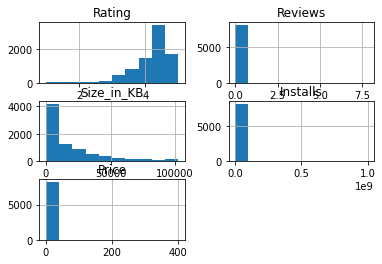

In [49]:
# Let's check the skeness of data.
GPStore.hist()
plt.show()

### Rating feature skewed to right so we have to use median instead of mean, for size data seems to skewed to left so the mean will be lower than the median for size feature.

In [50]:
# installing the pandas profiling
try:
    !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
except BaseException as be:
    Print("Please restart runtime",be) 

     |████████████████████████████████| 25.9 MB 40.1 MB/s 
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 34.2 MB/s 
     |████████████████████████████████| 102 kB 11.5 MB/s 
     |████████████████████████████████| 675 kB 34.8 MB/s 
     |████████████████████████████████| 4.7 MB 43.4 MB/s 
     |████████████████████████████████| 62 kB 834 kB/s 
     |████████████████████████████████| 812 kB 50.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=3c9ee9d4876b3392b529fddb690a960657138a693318e1b633fc35e3b012b0a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-p30w2kdq/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3c71de37b36dfb0a4d365d6fde4d9bc2ecd951c7af221faa5dda66d0ff6975ca
  Stored in directory: /r

In [51]:
# Importing profile report from pandas profiling.
from pandas_profiling import profile_report

In [52]:
# Collecting The Pandas Profile Report.
GPStore.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pandas Profiling provides us a piece of very basic and useful information about the data without doing any explicit exploratory data analysis. That's what we love about pandas profiling, as we can see in the pandas profiling report it shows the correlation between features, Basically, pandas profiling tries to cover all the features with their properties.